In [47]:
# LSTM 모델 저장
lstm_model.save('lstm_model')  # SavedModel 형식으로 저장

# RNN 모델 저장
rnn_model.save('rnn_model')  # SavedModel 형식으로 저장

# GRU 모델 저장
gru_model.save('gru_model')  # SavedModel 형식으로 저장


INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: rnn_model\assets


INFO:tensorflow:Assets written to: rnn_model\assets


INFO:tensorflow:Assets written to: gru_model\assets


INFO:tensorflow:Assets written to: gru_model\assets


In [8]:
from tensorflow.keras.models import load_model

# LSTM 모델 로드
lstm_model = load_model('lstm_model')

# RNN 모델 로드
rnn_model = load_model('rnn_model')

# GRU 모델 로드
gru_model = load_model('gru_model')


In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
model.summary()

(4623, 27) (4623,)
(1156, 27) (1156,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer_1 (LSTM)         (None, 27, 64)            16896     
                                                                 
 lstm_layer_2 (LSTM)         (None, 32)                12416     
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('TestsetData.csv')

test_input_df = df.iloc[:, :27]
test_target_df = df['temp_0m_tom']

test_input = test_input_df.values.tolist()
test_target = test_target_df.values.tolist()
test_target = np.array(test_target)

yes_sst = df['temp_0m_yes']
yes_sst = yes_sst.tolist()


37/37 [==============================] - 1s 5ms/step


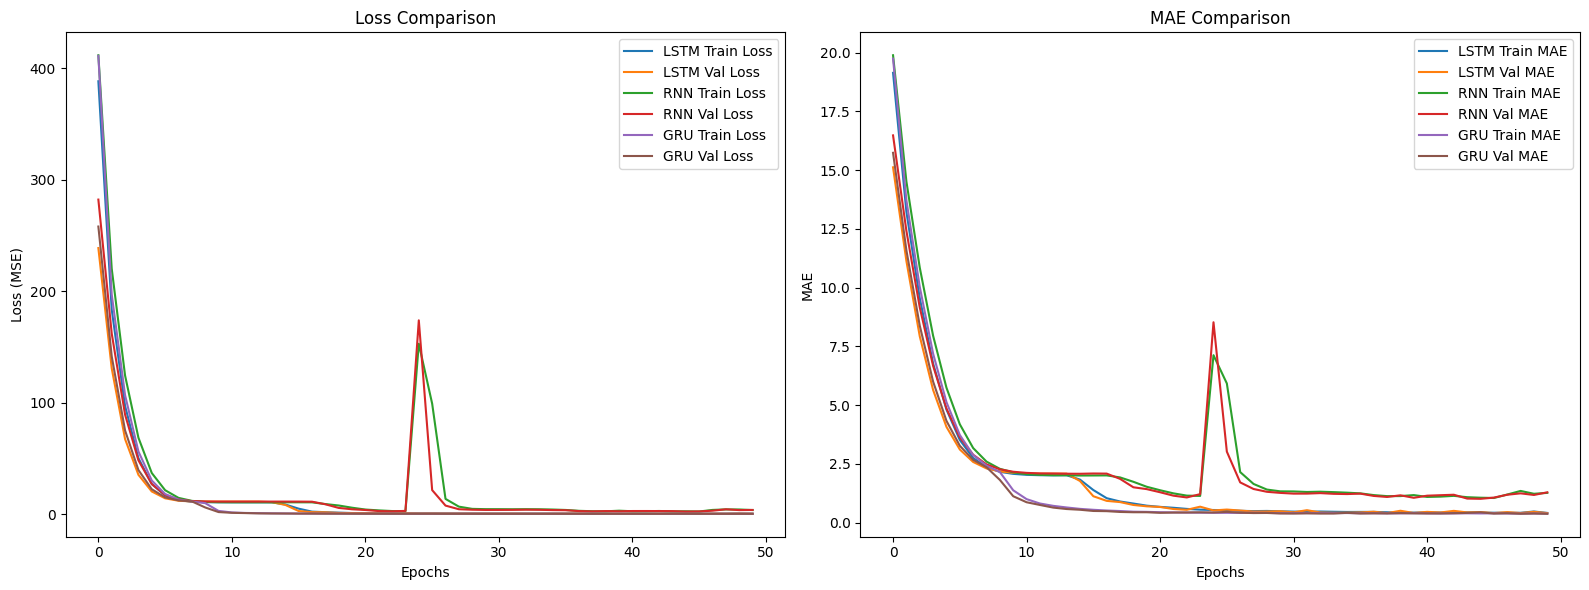

In [48]:
### MainCode

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.initializers import GlorotUniform, Orthogonal, Zeros

# 시드 설정
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

df = pd.read_csv('MachineLearningData.csv')

input_df = df.iloc[:, :27]
target_df = df['temp_0m_tom']

all_input = input_df.values.tolist()
all_target = target_df.values.tolist()
all_target = np.array(all_target)

train_input, val_input, train_target, val_target = train_test_split(all_input, all_target, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
val_scaled = ss.transform(val_input)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(27, 1), 
                    kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                    recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                    bias_initializer=Zeros(),                   # 편향 초기화
                    name='lstm_layer_1'))
lstm_model.add(LSTM(32, activation='tanh',
                    kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                    recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                    bias_initializer=Zeros(),                   # 편향 초기화
                    name='lstm_layer_2'))
lstm_model.add(Dense(1, activation='linear', name='output'))

lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(27, 1), 
                        kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                        recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                        bias_initializer=Zeros(),                   # 편향 초기화
                        name='rnn_layer_1'))
rnn_model.add(SimpleRNN(32, activation='tanh', 
                        kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                        recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                        bias_initializer=Zeros(),                   # 편향 초기화
                        name='rnn_layer_2'))
rnn_model.add(Dense(1, activation='linear', name='output'))

rnn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# GRU model
gru_model = Sequential()
gru_model.add(GRU(64, activation='tanh', return_sequences=True, input_shape=(27, 1), 
                  kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                  recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                  bias_initializer=Zeros(),                   # 편향 초기화
                  name='gru_layer_1'))
gru_model.add(GRU(32, activation='tanh',
                  kernel_initializer=GlorotUniform(seed=42),   # 시드 설정
                  recurrent_initializer=Orthogonal(seed=42),  # 시드 설정
                  bias_initializer=Zeros(),                   # 편향 초기화
                  name='GRU_layer_2'))
gru_model.add(Dense(1, activation='linear', name='output'))

gru_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# LinearRegression model
# linear_model = LinearRegression()

# Model training
lstm_history = lstm_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
rnn_history = rnn_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
gru_history = gru_model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), verbose=0)
# linear_model.fit(train_scaled.reshape(train_scaled.shape[0], -1), train_target)

# Validation predict
lstm_val_predictions = lstm_model.predict(val_scaled)
rnn_val_predictions = rnn_model.predict(val_scaled)
gru_val_predictions = gru_model.predict(val_scaled)
# linear_val_predictions = linear_model.predict(val_scaled.reshape(val_scaled.shape[0], -1))

# evaluation
lstm_val_loss = lstm_history.history['val_loss']
rnn_val_loss = rnn_history.history['val_loss']
gru_val_loss = gru_history.history['val_loss']
# linear_val_loss = mean_squared_error(val_target, linear_val_predictions)

lstm_val_mae = lstm_history.history['val_mae']
rnn_val_mae = rnn_history.history['val_mae']
gru_val_mae = gru_history.history['val_mae']
# linear_val_mae = mean_absolute_error(val_target, linear_val_predictions)

# plotting
plt.figure(figsize=(16, 6))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
# plt.axhline(y=linear_val_loss, color='r', linestyle='--', label='Linear Model Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE graph
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['mae'], label='LSTM Train MAE')
plt.plot(lstm_history.history['val_mae'], label='LSTM Val MAE')
plt.plot(rnn_history.history['mae'], label='RNN Train MAE')
plt.plot(rnn_history.history['val_mae'], label='RNN Val MAE')
plt.plot(gru_history.history['mae'], label='GRU Train MAE')
plt.plot(gru_history.history['val_mae'], label='GRU Val MAE')
# plt.axhline(y=linear_val_mae, color='r', linestyle='--', label='Linear Model MAE')
plt.title('MAE Comparison')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 0s 6ms/step
LSTM Test MSE: 1.1220097845612458
LSTM Test MAE: 0.8048385141317734


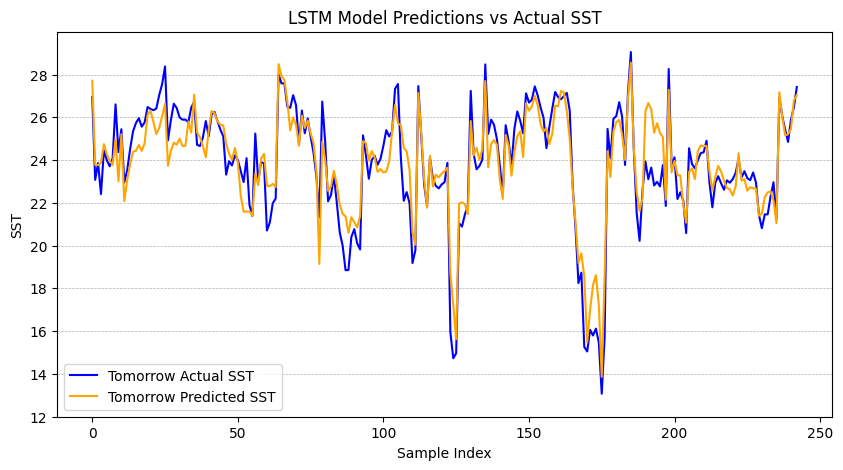

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('TestsetData.csv')

test_input_df = df.iloc[:, :27]
test_target_df = df['temp_0m_tom']

test_input = test_input_df.values.tolist()
test_target = test_target_df.values.tolist()
test_target = np.array(test_target)

yes_sst = df['temp_0m_yes']
yes_sst = yes_sst.tolist()

test_scaled = ss.transform(test_input)

lstm_test_predictions = lstm_model.predict(test_scaled)

test_mse = mean_squared_error(test_target, lstm_test_predictions)
test_mae = mean_absolute_error(test_target, lstm_test_predictions)

print("LSTM Test MSE:", test_mse)
print("LSTM Test MAE:", test_mae)

plt.figure(figsize=(10, 5))
# plt.plot(yes_sst, label='Yesterday Actual SST', color='red')
plt.plot(test_target, label='Tomorrow Actual SST', color='blue')
plt.plot(lstm_test_predictions, label='Tomorrow Predicted SST', color='orange')
                
plt.title('LSTM Model Predictions vs Actual SST')
plt.xlabel('Sample Index')
plt.ylabel('SST')

plt.ylim(12, 30)
plt.yticks(np.arange(12, 30, 2))

plt.legend(loc='lower left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [41]:
flattened_lstm_test_predictions = [i for sublist in lstm_test_predictions for i in sublist]
kkkk = flattened_lstm_test_predictions - test_target
indices = [index for index, value in enumerate(kkkk) if abs(value) >= 2]
print(indices)

[53, 60, 78, 87, 107, 123, 124, 169, 172, 173, 176, 190, 191, 192, 193, 194, 195]


8/8 [==============================] - 0s 5ms/step
GRU Test MSE: 1.2520477772488947
GRU Test MAE: 0.8116334436361682


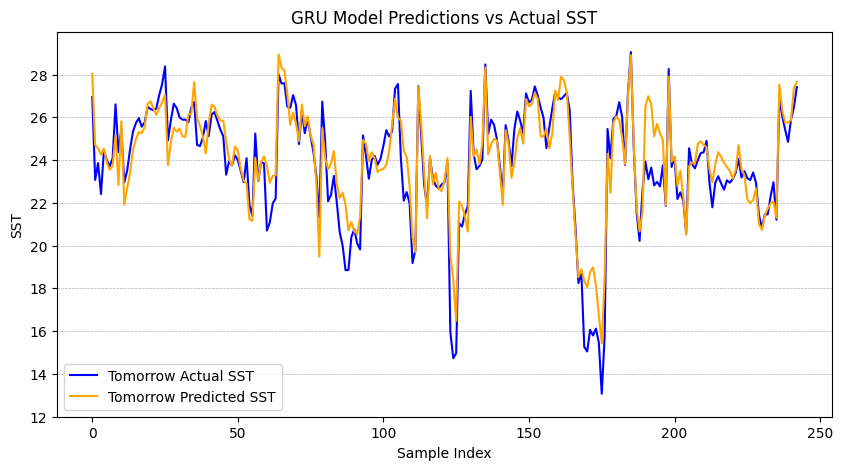

In [44]:
gru_test_predictions = gru_model.predict(test_scaled)

test_mse = mean_squared_error(test_target, gru_test_predictions)
test_mae = mean_absolute_error(test_target, gru_test_predictions)

print("GRU Test MSE:", test_mse)
print("GRU Test MAE:", test_mae)

plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Tomorrow Actual SST', color='blue')
plt.plot(gru_test_predictions, label='Tomorrow Predicted SST', color='orange')
plt.title('GRU Model Predictions vs Actual SST')
plt.xlabel('Sample Index')
plt.ylabel('SST')

plt.ylim(12, 30)
plt.yticks(np.arange(12, 30, 2))

plt.legend(loc='lower left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

8/8 [==============================] - 0s 3ms/step
RNN Test MSE: 6.056254007533927
RNN Test MAE: 1.8559850292441287


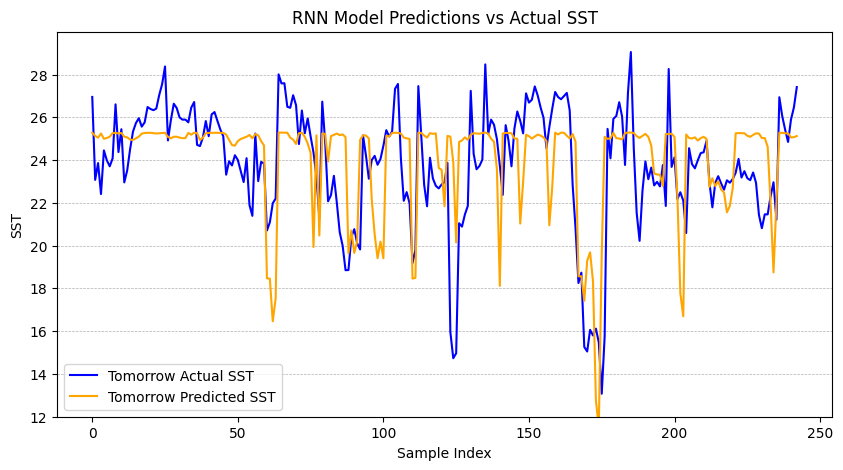

In [45]:
rnn_test_predictions = rnn_model.predict(test_scaled)

test_mse = mean_squared_error(test_target, rnn_test_predictions)
test_mae = mean_absolute_error(test_target, rnn_test_predictions)

print("RNN Test MSE:", test_mse)
print("RNN Test MAE:", test_mae)

plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Tomorrow Actual SST', color='blue')
plt.plot(rnn_test_predictions, label='Tomorrow Predicted SST', color='orange')
plt.title('RNN Model Predictions vs Actual SST')
plt.xlabel('Sample Index')
plt.ylabel('SST')

plt.ylim(12, 30)
plt.yticks(np.arange(12, 30, 2))

plt.legend(loc='lower left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

Linear Regression Test MSE: 0.5198470497427966
Linear Regression Test MAE: 0.5431733671860378


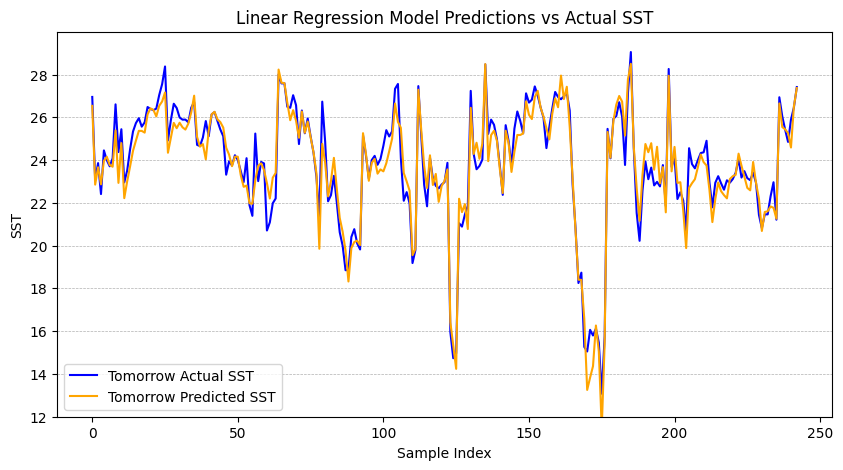

In [46]:
linear_test_predictions = linear_model.predict(test_scaled.reshape(test_scaled.shape[0], -1))

test_mse_linear = mean_squared_error(test_target, linear_test_predictions)
test_mae_linear = mean_absolute_error(test_target, linear_test_predictions)

print("Linear Regression Test MSE:", test_mse_linear)
print("Linear Regression Test MAE:", test_mae_linear)

plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Tomorrow Actual SST', color='blue')
plt.plot(linear_test_predictions, label='Tomorrow Predicted SST', color='orange')
plt.title('Linear Regression Model Predictions vs Actual SST')
plt.xlabel('Sample Index')
plt.ylabel('SST')

plt.ylim(12, 30)
plt.yticks(np.arange(12, 30, 2))

plt.legend(loc='lower left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()


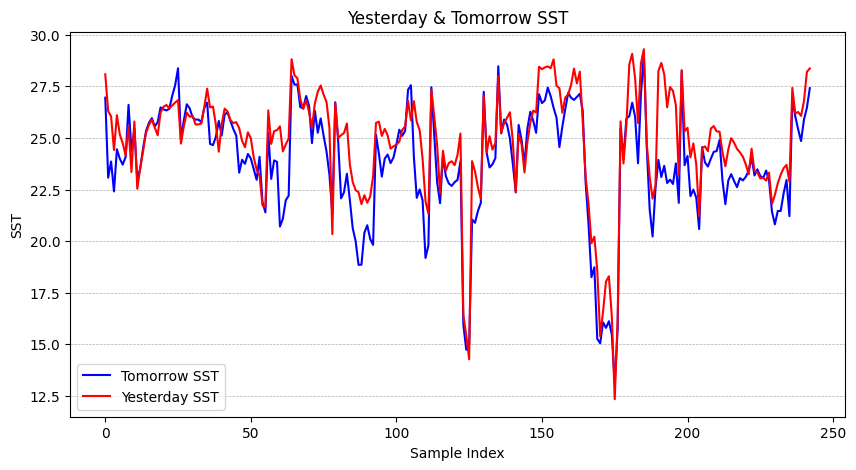

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Tomorrow SST', color='blue')
plt.plot(yes_sst, label='Yesterday SST', color='red')
plt.title('Yesterday & Tomorrow SST')
plt.xlabel('Sample Index')
plt.ylabel('SST')
plt.legend(loc='lower left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()